In [2]:
# Kaydedilen modeli test etme
# Testing the saved model with real.jpeg

# Gerekli kütüphaneleri yükleme
import os
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np

print("Kütüphaneler yüklendi!")
print("Libraries loaded successfully!")

Kütüphaneler yüklendi!
Libraries loaded successfully!


In [3]:
# Kaydedilen modeli yükleme
# Loading the saved model
model_path = "best_futbol.pt"
model = YOLO(model_path)

print(f"Model yüklendi: {model_path}")
print(f"Model loaded: {model_path}")

# Model bilgilerini gösterme
print("\nModel bilgileri:")
print("Model information:")
print(f"Model tipi: {type(model)}")
print(f"Model type: {type(model)}")

Model yüklendi: best_futbol.pt
Model loaded: best_futbol.pt

Model bilgileri:
Model information:
Model tipi: <class 'ultralytics.models.yolo.model.YOLO'>
Model type: <class 'ultralytics.models.yolo.model.YOLO'>


In [4]:
# Test görselini yükleme ve kontrol etme
# Loading and checking the test image
image_path = "f.jpg"

# Görsel dosyasının var olup olmadığını kontrol etme
if os.path.exists(image_path):
    print(f"✓ Test görseli bulundu: {image_path}")
    print(f"✓ Test image found: {image_path}")
    
    # Görseli OpenCV ile yükleme
    image = cv2.imread(image_path)
    if image is not None:
        print(f"Görsel boyutu: {image.shape}")
        print(f"Image dimensions: {image.shape}")
    else:
        print("❌ Görsel yüklenemedi!")
        print("❌ Failed to load image!")
else:
    print(f"❌ Test görseli bulunamadı: {image_path}")
    print(f"❌ Test image not found: {image_path}")

✓ Test görseli bulundu: f.jpg
✓ Test image found: f.jpg
Görsel boyutu: (917, 1000, 3)
Image dimensions: (917, 1000, 3)


In [5]:
# Modeli test görselinde çalıştırma
# Running the model on the test image
print("Model tahminlerini çalıştırıyor...")
print("Running model predictions...")

# YOLO modelini görsel üzerinde çalıştırma
results = model(image_path)

print("✓ Tahminler tamamlandı!")
print("✓ Predictions completed!")
print(f"Tespit edilen nesne sayısı: {len(results[0].boxes) if results[0].boxes is not None else 0}")
print(f"Number of detected objects: {len(results[0].boxes) if results[0].boxes is not None else 0}")

Model tahminlerini çalıştırıyor...
Running model predictions...



image 1/1 c:\Users\User\Desktop\futbol\f.jpg: 608x640 2 players, 179.9ms
Speed: 5.3ms preprocess, 179.9ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)
✓ Tahminler tamamlandı!
✓ Predictions completed!
Tespit edilen nesne sayısı: 2
Number of detected objects: 2


In [6]:
# Tespit sonuçlarını detaylı olarak gösterme
# Displaying detection results in detail
if results[0].boxes is not None and len(results[0].boxes) > 0:
    print("\n🔍 Detaylı tespit sonuçları:")
    print("🔍 Detailed detection results:")
    
    for i, box in enumerate(results[0].boxes):
        # Koordinatlar
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        
        print(f"\nNesne {i+1} / Object {i+1}:")
        print(f"  Sınıf / Class: {class_name}")
        print(f"  Güven oranı / Confidence: {confidence:.2f}")
        print(f"  Koordinatlar / Coordinates: ({x1:.0f}, {y1:.0f}) - ({x2:.0f}, {y2:.0f})")
        print(f"  Genişlik x Yükseklik / Width x Height: {x2-x1:.0f} x {y2-y1:.0f}")
else:
    print("\n❌ Hiçbir nesne tespit edilemedi!")
    print("❌ No objects detected!")


🔍 Detaylı tespit sonuçları:
🔍 Detailed detection results:

Nesne 1 / Object 1:
  Sınıf / Class: player
  Güven oranı / Confidence: 0.76
  Koordinatlar / Coordinates: (18, 0) - (973, 917)
  Genişlik x Yükseklik / Width x Height: 954 x 917

Nesne 2 / Object 2:
  Sınıf / Class: player
  Güven oranı / Confidence: 0.53
  Koordinatlar / Coordinates: (5, 0) - (517, 917)
  Genişlik x Yükseklik / Width x Height: 513 x 917


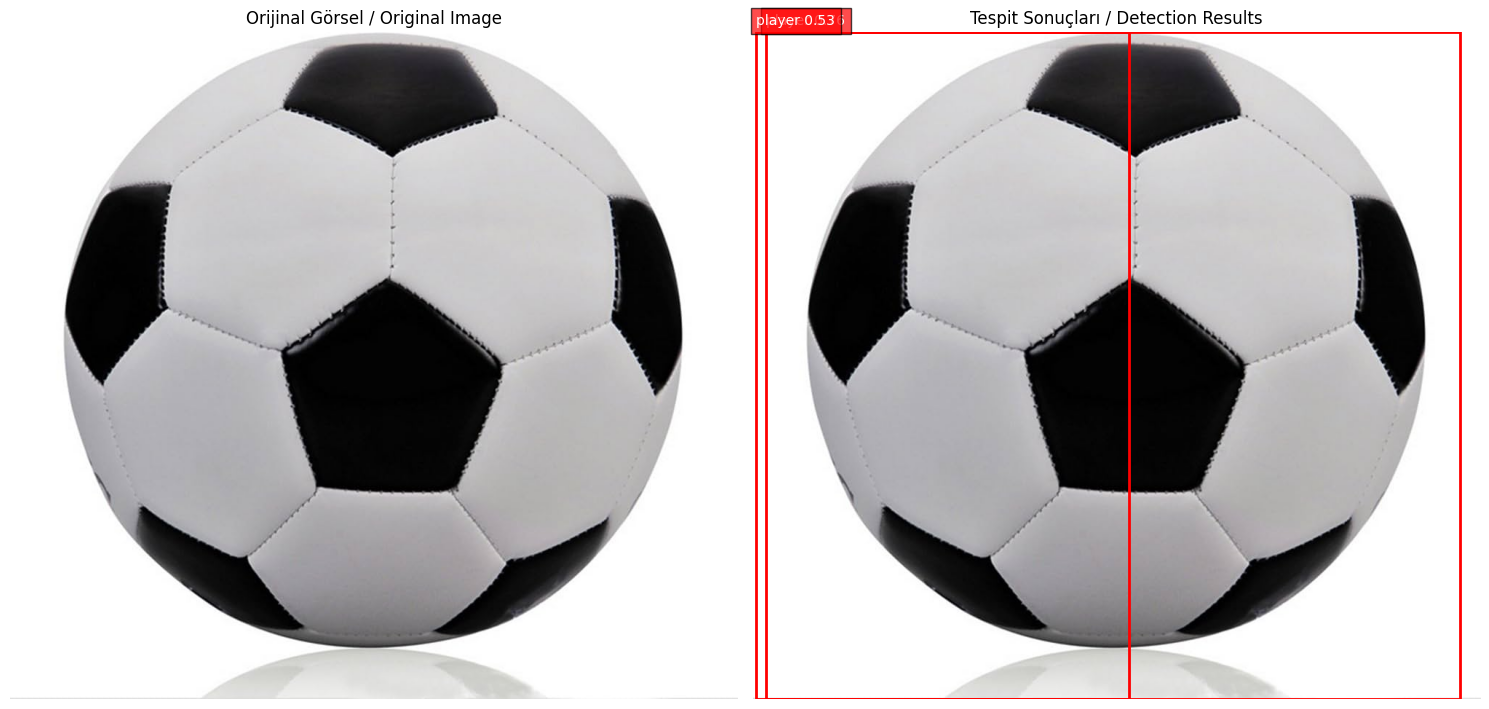


✅ Test tamamlandı! Model başarıyla f.jpg dosyasında test edildi.
✅ Testing completed! Model successfully tested on f.jpg.


In [7]:
# Sonuçları görselleştirme
# Visualizing the results
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Görseli PIL ile yükleme
pil_image = Image.open(image_path)
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Matplotlib figure oluşturma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

# Orijinal görsel
ax1.imshow(rgb_image)
ax1.set_title('Orijinal Görsel / Original Image')
ax1.axis('off')

# Tespit edilmiş nesnelerle görsel
ax2.imshow(rgb_image)
ax2.set_title('Tespit Sonuçları / Detection Results')
ax2.axis('off')

# Tespit edilmiş nesneleri çizme
if results[0].boxes is not None and len(results[0].boxes) > 0:
    for i, box in enumerate(results[0].boxes):
        x1, y1, x2, y2 = box.xyxy[0].cpu().numpy()
        confidence = float(box.conf[0])
        class_id = int(box.cls[0])
        class_name = model.names[class_id]
        
        # Bounding box çizme
        rect = patches.Rectangle((x1, y1), x2-x1, y2-y1, 
                               linewidth=2, edgecolor='red', facecolor='none')
        ax2.add_patch(rect)
        
        # Label ekleme
        ax2.text(x1, y1-10, f'{class_name} {confidence:.2f}', 
                bbox=dict(facecolor='red', alpha=0.7), 
                fontsize=10, color='white')

plt.tight_layout()
plt.show()

print(f"\n✅ Test tamamlandı! Model başarıyla {image_path} dosyasında test edildi.")
print(f"✅ Testing completed! Model successfully tested on {image_path}.")

In [8]:
# Video Tennis Ball Detection - tenis_best.pt with tenis_test.mp4
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
import os

# Model and video file paths
model_path = "futbol_best.pt"
video_path = "futbol_test.mp4"
output_path = "futbol_sonuc.mp4" # Changed output filename

print(f"Model: {model_path}")
print(f"Video: {video_path}")

# File checks
if not os.path.exists(model_path):
    print(f"ERROR: Model file not found: {model_path}")
    exit()

if not os.path.exists(video_path):
    print(f"ERROR: Video file not found: {video_path}")
    print("Please add tenis_test.mp4 file to the workspace")
    exit()

# Load the model
print("Loading model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video properties:")
print(f"  Size: {width}x{height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print(f"Processing video...")

frame_count = 0
# Removed pothole_detections list as we are focusing on detection for now

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Show progress every 10 frames
    if frame_count % 10 == 0:
        progress = (frame_count / total_frames) * 100
        print(f"Processed: {frame_count}/{total_frames} frames ({progress:.1f}%)")

    # Perform YOLO detection
    results = model(frame, verbose=False)

    # Draw results on the frame
    annotated_frame = results[0].plot()

    # You can add code here later to process detections for speed calculation
    # For now, we will just save the annotated frame

    # Write to output video
    out.write(annotated_frame)

# Cleanup
cap.release()
out.release()

print(f"\nVideo processing finished!")
print(f"Result video: {output_path}")

# Removed statistics and plotting related to potholes

print(f"\nCompleted! To open the result video: {output_path}")

Model: futbol_best.pt
Video: futbol_test.mp4
Loading model...
Model loaded successfully!
Video properties:
  Size: 720x1280
  FPS: 30
  Total frames: 390
Processing video...
Processed: 10/390 frames (2.6%)
Processed: 20/390 frames (5.1%)
Processed: 30/390 frames (7.7%)
Processed: 40/390 frames (10.3%)
Processed: 50/390 frames (12.8%)
Processed: 60/390 frames (15.4%)
Processed: 70/390 frames (17.9%)
Processed: 80/390 frames (20.5%)
Processed: 90/390 frames (23.1%)
Processed: 100/390 frames (25.6%)
Processed: 110/390 frames (28.2%)
Processed: 120/390 frames (30.8%)
Processed: 130/390 frames (33.3%)
Processed: 140/390 frames (35.9%)
Processed: 150/390 frames (38.5%)
Processed: 160/390 frames (41.0%)
Processed: 170/390 frames (43.6%)
Processed: 180/390 frames (46.2%)
Processed: 190/390 frames (48.7%)
Processed: 200/390 frames (51.3%)
Processed: 210/390 frames (53.8%)
Processed: 220/390 frames (56.4%)
Processed: 230/390 frames (59.0%)
Processed: 240/390 frames (61.5%)
Processed: 250/390 fra

In [9]:
# Video Tennis Ball Detection - tenis_best.pt with tenis_test.mp4
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
import numpy as np
import os

# Model and video file paths
model_path = "futbol_best.pt"
video_path = "shs.mp4"
output_path = "futbol_shs_sonuc.mp4" # Changed output filename

print(f"Model: {model_path}")
print(f"Video: {video_path}")

# File checks
if not os.path.exists(model_path):
    print(f"ERROR: Model file not found: {model_path}")
    exit()

if not os.path.exists(video_path):
    print(f"ERROR: Video file not found: {video_path}")
    print("Please add tenis_test.mp4 file to the workspace")
    exit()

# Load the model
print("Loading model...")
model = YOLO(model_path)
print("Model loaded successfully!")

# Open the video
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

print(f"Video properties:")
print(f"  Size: {width}x{height}")
print(f"  FPS: {fps}")
print(f"  Total frames: {total_frames}")

# Output video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

print(f"Processing video...")

frame_count = 0
# Removed pothole_detections list as we are focusing on detection for now

while True:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1

    # Show progress every 10 frames
    if frame_count % 10 == 0:
        progress = (frame_count / total_frames) * 100
        print(f"Processed: {frame_count}/{total_frames} frames ({progress:.1f}%)")

    # Perform YOLO detection
    results = model(frame, verbose=False)

    # Draw results on the frame
    annotated_frame = results[0].plot()

    # You can add code here later to process detections for speed calculation
    # For now, we will just save the annotated frame

    # Write to output video
    out.write(annotated_frame)

# Cleanup
cap.release()
out.release()

print(f"\nVideo processing finished!")
print(f"Result video: {output_path}")

# Removed statistics and plotting related to potholes

print(f"\nCompleted! To open the result video: {output_path}")

Model: futbol_best.pt
Video: shs.mp4
Loading model...
Model loaded successfully!
Video properties:
  Size: 1280x790
  FPS: 30
  Total frames: 242
Processing video...
Processed: 10/242 frames (4.1%)
Processed: 20/242 frames (8.3%)
Processed: 30/242 frames (12.4%)
Processed: 40/242 frames (16.5%)
Processed: 50/242 frames (20.7%)
Processed: 60/242 frames (24.8%)
Processed: 70/242 frames (28.9%)
Processed: 80/242 frames (33.1%)
Processed: 90/242 frames (37.2%)
Processed: 100/242 frames (41.3%)
Processed: 110/242 frames (45.5%)
Processed: 120/242 frames (49.6%)
Processed: 130/242 frames (53.7%)
Processed: 140/242 frames (57.9%)
Processed: 150/242 frames (62.0%)
Processed: 160/242 frames (66.1%)
Processed: 170/242 frames (70.2%)
Processed: 180/242 frames (74.4%)
Processed: 190/242 frames (78.5%)
Processed: 200/242 frames (82.6%)
Processed: 210/242 frames (86.8%)
Processed: 220/242 frames (90.9%)
Processed: 230/242 frames (95.0%)
Processed: 240/242 frames (99.2%)

Video processing finished!
R